In [2]:
rm(list=ls())
my.libs=c("Seurat","scran","scater","harmony","ggtree","ggplot2","cowplot","pROC","RColorBrewer","org.Hs.eg.db")
lapply(my.libs, require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

In [3]:
dir=c("/home/matthias/chicken/")
dat.dir=c("/home/matthias/chicken/source_data/")
load(paste0(dat.dir,"QC_ok_mtRNA30_LEG_1.RData"))
leg1=dat1
load(paste0(dat.dir,"QC_ok_mtRNA30LEG_2.RData"))
leg2=dat1
load(paste0(dat.dir,"QC_ok_mtRNA30_LEG_3.RData"))
leg3=dat1
leg1@meta.data$replicate=rep(1,nrow(leg1@meta.data))
leg2@meta.data$replicate=rep(2,nrow(leg2@meta.data))
leg3@meta.data$replicate=rep(3,nrow(leg3@meta.data))

In [4]:
chicken.comb = merge(leg1, y = leg2, project = "chicken")
chicken.comb1 =merge(chicken.comb,y=leg3,project = "chicken")

Warning message in CheckDuplicateCellNames(object.list = objects):
“Some cell names are duplicated across objects provided. Renaming to enforce unique cell names.”

In [5]:
head(chicken.comb1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,doub_score,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,CC.Difference,replicate
AAACCTGAGAATAGGG-1_1,SeuratProject,366,244,0.000000,13.064133,916,300,-0.007016679,0.017113929,G2M,SeuratProject,-0.024130609,1
AAACCTGAGACAGACC-1_1,SeuratProject,1097,455,1.714799,2.053571,1095,453,-0.010900393,-0.018635772,G1,SeuratProject,0.007735379,1
AAACCTGAGGTGCAAC-1_1,SeuratProject,757,394,4.349522,5.137845,972,399,0.050627404,0.006624701,S,SeuratProject,0.044002702,1
AAACCTGAGTTGCAGG-1_1,SeuratProject,1313,540,3.202742,1.129518,1159,539,-0.017155208,-0.018723735,G1,SeuratProject,0.001568527,1
AAACCTGCACCACCAG-1_1,SeuratProject,3059,1099,2.768196,1.354402,1404,920,0.065230522,-0.029914334,S,SeuratProject,0.095144855,1
AAACCTGCATGCATGT-1_1,SeuratProject,2748,711,1.863766,1.186624,1302,621,-0.026489118,-0.015331881,G1,SeuratProject,-0.011157238,1


In [6]:
chicken.comb1=SCTransform(chicken.comb1, variable.features.n = NULL, vars.to.regress = c("percent.mt","CC.Difference"), 
            conserve.memory = F, return.only.var.genes = F) %>% RunPCA(verbose = TRUE)
chicken.comb1@meta.data$replicate=as.factor(chicken.comb1@meta.data$replicate)
all.vars=as.character(rownames(chicken.comb1))
dat1_harmony = RunHarmony(chicken.comb1, assay.use="SCT",group.by.vars = "replicate",vars_use=all.vars) # assay.use="SCT #vars_use=all.vars

Calculating cell attributes for input UMI matrix
Variance stabilizing transformation of count matrix of size 12661 by 15294
Model formula is y ~ log_umi
Get Negative Binomial regression parameters per gene
Using 2000 genes, 15294 cells


  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |=========                                                             |  12%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |==========================                                            |  38%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |============================================                          |  62%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |=============================================================         |  88%

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration 

  |======================================================================| 100%


Found 21 outliers - those will be ignored in fitting/regularization step

Second step: Get residuals using fitted parameters for 12661 genes


  |======================================================================| 100%


Computing corrected count matrix for 12661 genes


  |======================================================================| 100%


Calculating gene attributes
Wall clock passed: Time difference of 6.947714 mins
Determine variable features
Set 1400 variable features
Place corrected count matrix in counts slot
Regressing out percent.mt, CC.Difference
Centering data matrix
Set default assay to SCT
PC_ 1 
Positive:  COL1A2, ENSGALG00000036073, COL3A1, COL6A1, DCN, LUM, ENSGALG00000026613, GSN, COL6A2, GPX3 
	   VIM, COL6A3, C2orf40, ENSGALG00000032220, SPARC, SERPINF1, COL5A1, WIF1, S100A10, ENSGALG00000045199 
	   TGFBI, MGP, COL5A2, ENSGALG00000002771, ENSGALG00000036847, APOA1, FN1, COL8A1, OLFML3, CCDC80 
Negative:  Krt9L3, ENSGALG00000005619, ENSGALG00000027207, EDQL-EDC, FABP5, LGALS1, CBP63-K, ENSGALG00000028451, CSTA, Krt9LC2 
	   DSP, Krt9LC1, DBI, Krt14L1, NFKBIA, Krt78L2, ENSGALG00000027536, MT4, Krt14L2, ENSGALG00000007153 
	   CBP62-K, RPL32, ENSGALG00000043582, RPS15, RPS17, ELOVL4, ENSGALG00000045319, TPT1, DYNLL1, EDQM1-EDC 
PC_ 2 
Positive:  CBP63-K, CBP62-K, EDQL-EDC, FABP5, Krt9L4, ENSGALG0000004358

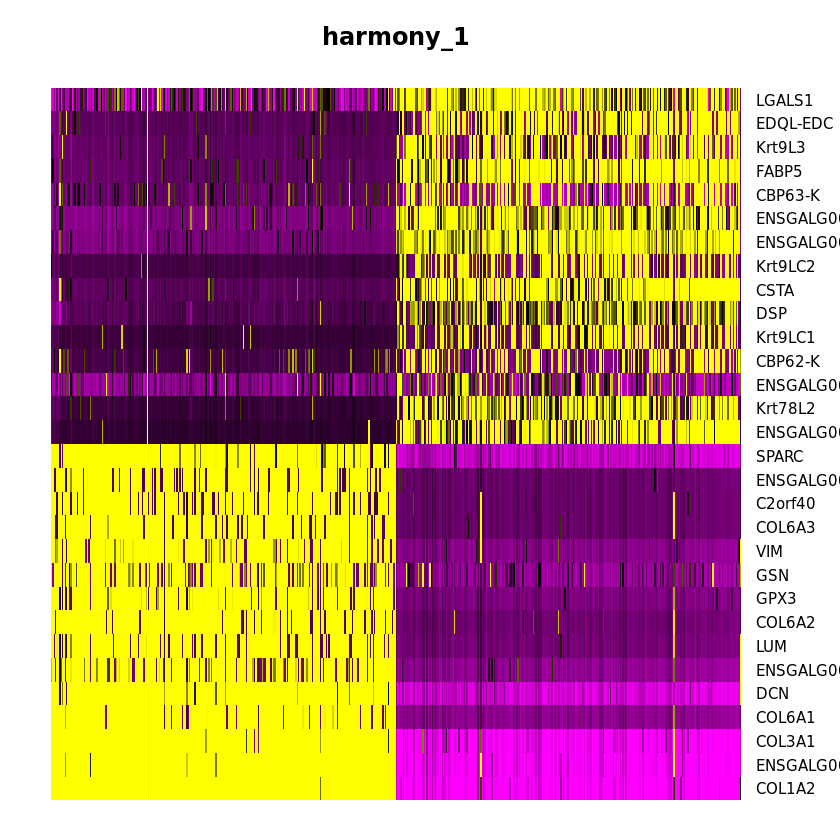

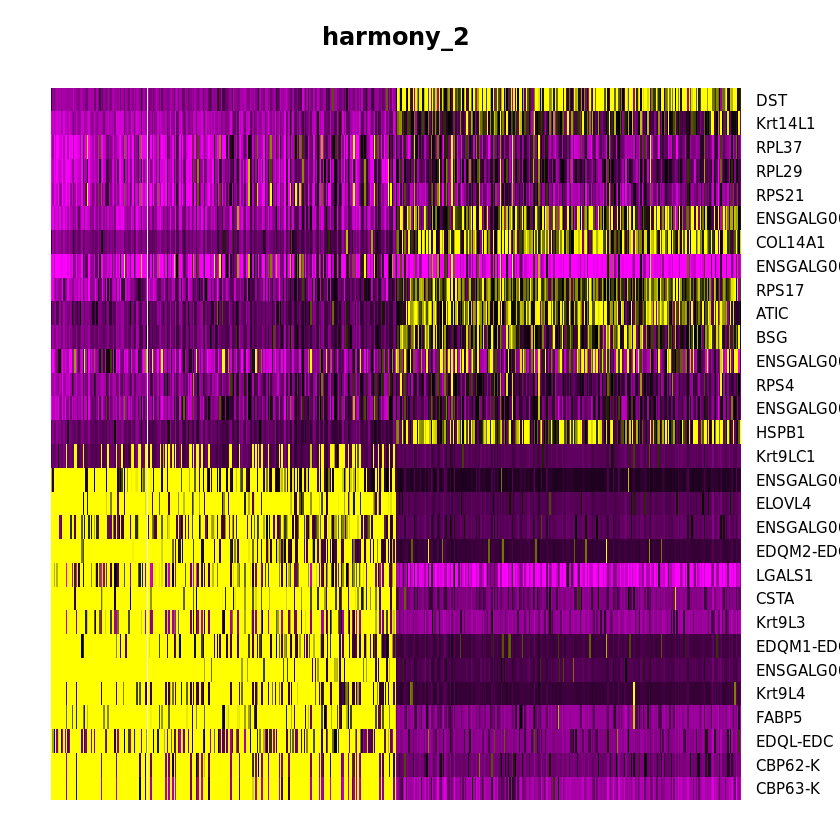

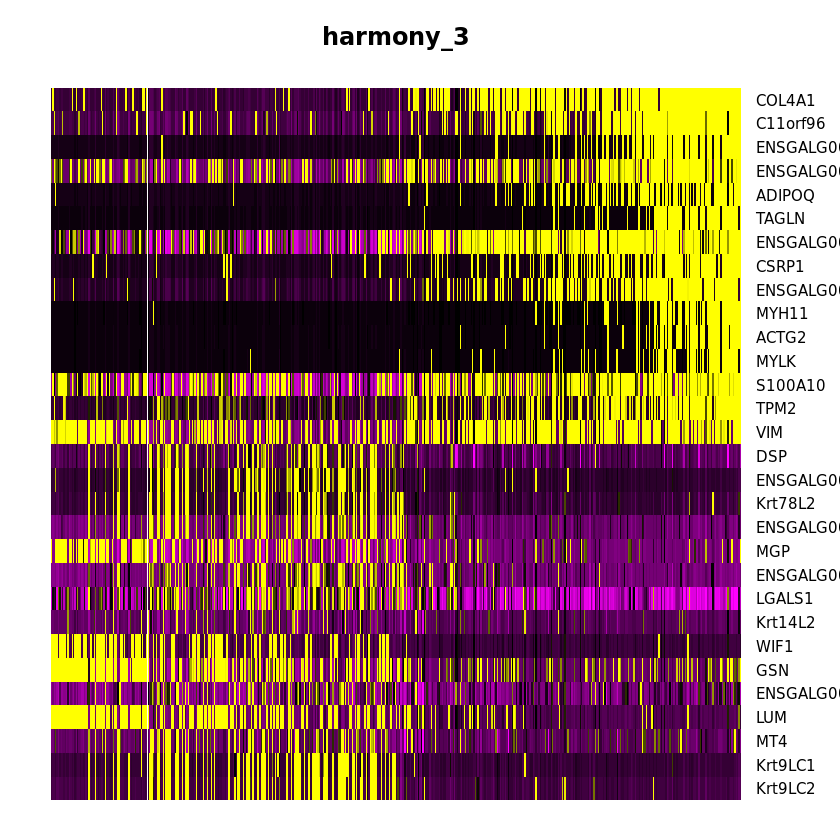

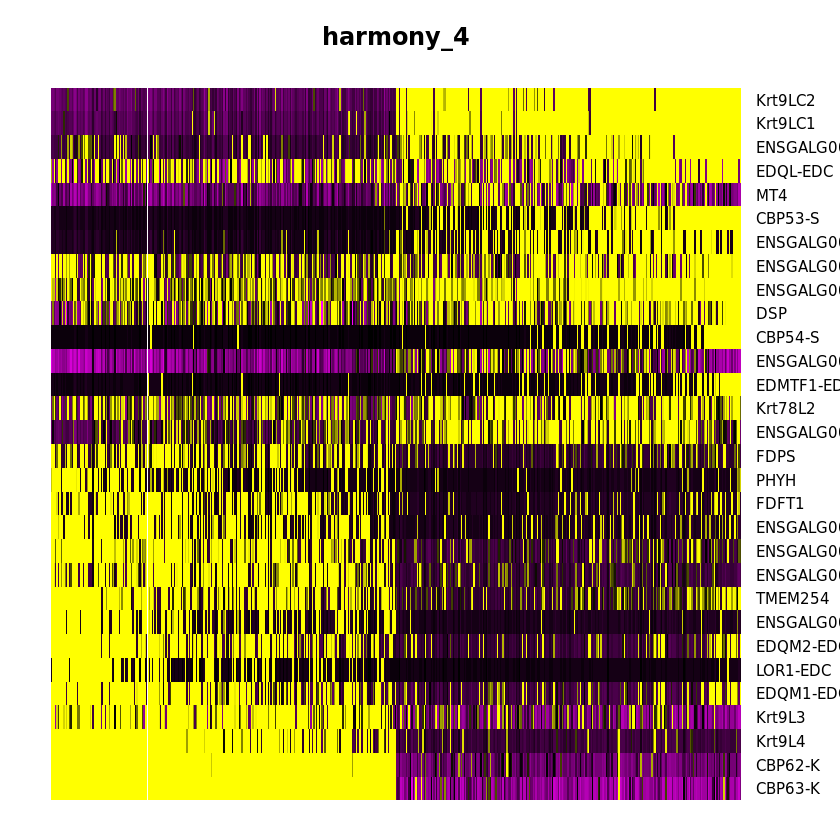

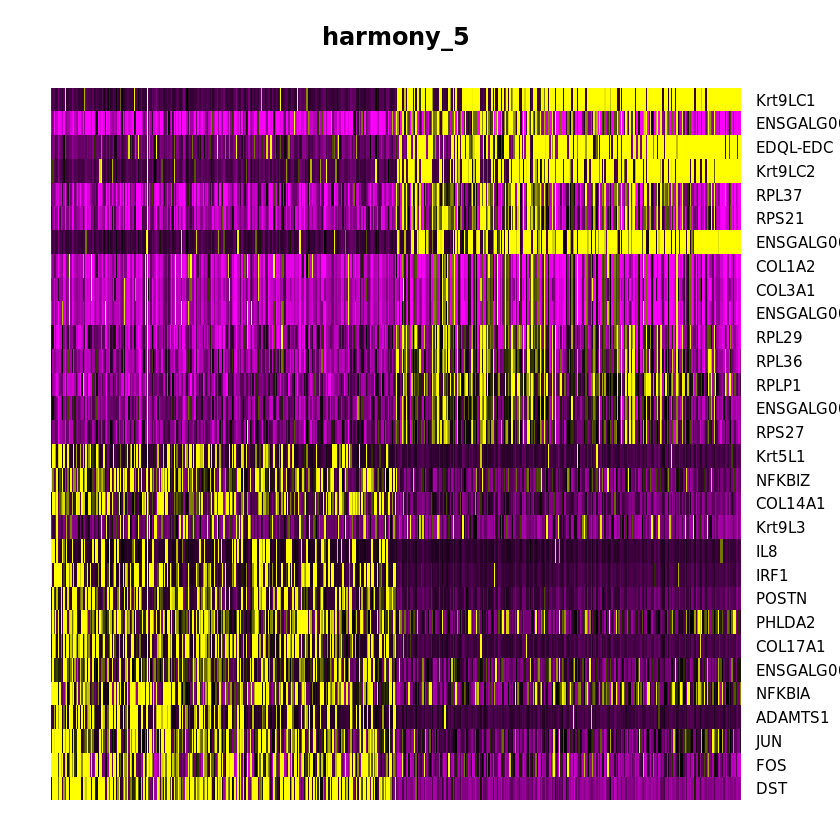

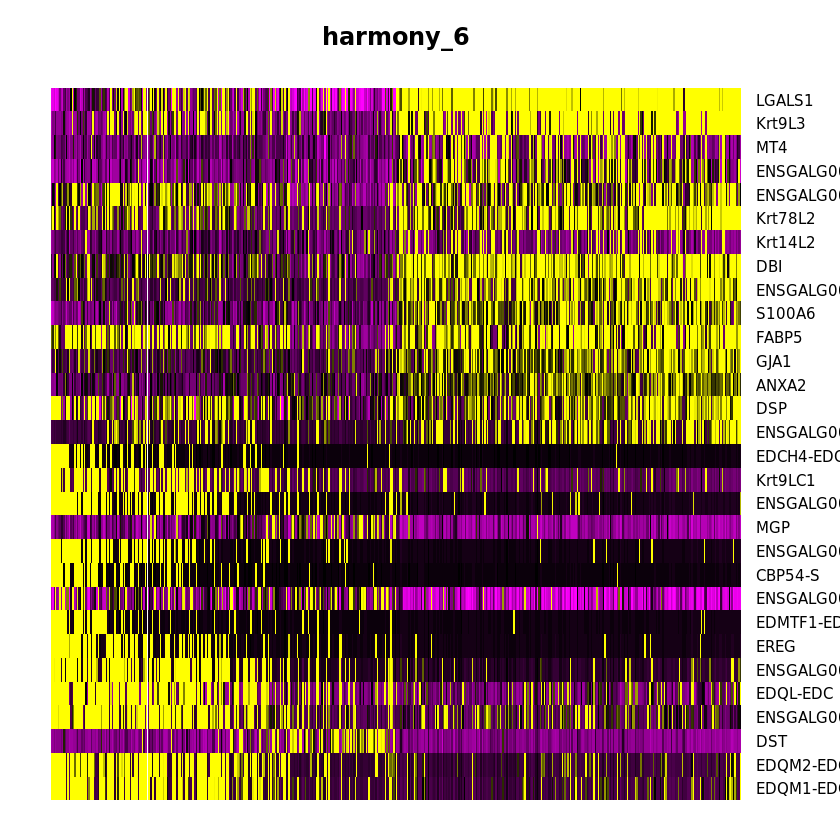

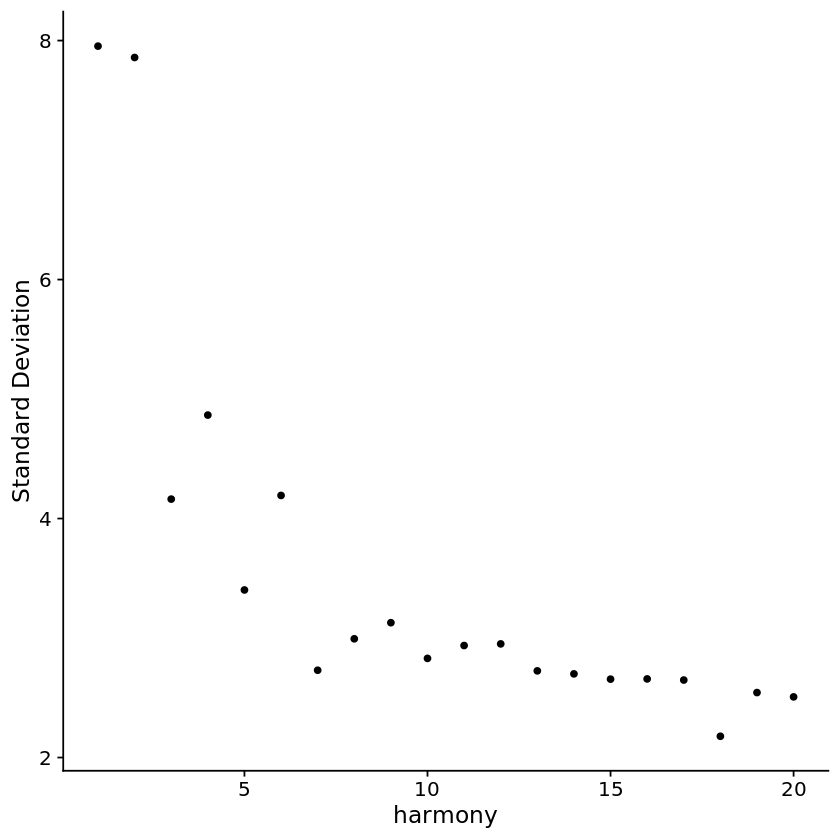

In [7]:
Seurat::DimHeatmap(dat1_harmony, reduction = "harmony",dims = 1, cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(dat1_harmony, dims = 2,reduction = "harmony", cells = 500, balanced = TRUE)  ### plot the top 500 cells (highest scores)
Seurat::DimHeatmap(dat1_harmony, dims = 3,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 4, reduction = "harmony",cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 5,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::DimHeatmap(dat1_harmony, dims = 6,reduction = "harmony", cells = 500, balanced = TRUE)
Seurat::ElbowPlot(dat1_harmony,reduction="harmony")

In [8]:
sig_PCs=c(1:16)
sce.seurat <- RunUMAP(dat1_harmony, reduction = "harmony",dims = sig_PCs)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”15:13:31 UMAP embedding parameters a = 0.9922 b = 1.112
15:13:31 Read 15294 rows and found 16 numeric columns
15:13:31 Using Annoy for neighbor search, n_neighbors = 30
15:13:31 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
15:13:34 Writing NN index file to temp file /tmp/RtmpBgcGxs/file1cc2f8ffb1c
15:13:34 Searching Annoy index using 1 thread, search_k = 3000
15:13:41 Annoy recall = 100%
15:13:42 Commencing smooth kNN distance calibration using 1 thread
15:13:44 Initializing from normalized Laplacian + noise
15:13:45 Commencing optimizatio

In [9]:
#sig_PCs=c(1,2,3,4,5,6,9,10,11,12,13,14,15)
sig_PCs=c(1:16)
sce.seurat1=Seurat::FindNeighbors(sce.seurat,reduction = "harmony",k.param = 20,dims=sig_PCs)  

Computing nearest neighbor graph
Computing SNN


In [10]:
clust_test=function(sce) {
  cont=as.data.frame(matrix(NA,nrow=length(unique(Idents(sce))), ncol=4))
  colnames(cont)=c("cluster","cells","mean_total_UMI","mean_features")
  i=1
  for (k in unique(Idents(sce))) {
    print(c(k))
    cont[i,1]=c(k)
    dat23=sce@assays$RNA@counts[,Idents(sce)%in%c(k)]
    cont[i,2]=table(Idents(sce)%in%c(k))[2]
    cont[i,3]=mean(apply(dat23,2,function(x)sum(x)))
    cont[i,4]=mean(apply(dat23,2,function(x)table(x %in% c(0))[1]))
    i=i+1
  }
  cont=cont[order(as.numeric(as.character(cont$cluster))),]
  return(cont)
}

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 15294
Number of edges: 500298

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8996
Number of communities: 9
Elapsed time: 2 seconds


Warning message:
“`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”Warning message:
“`mutate_()` is deprecated as of dplyr 0.7.0.
Please use `mutate()` instead.
See vignette('programming') for more help
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”

[1] "1"
[1] "0"
[1] "6"
[1] "3"
[1] "4"
[1] "5"
[1] "7"
[1] "2"
[1] "8"


,cluster,cells,mean_total_UMI,mean_features
2,0,6172,1420.3454,552.4046
1,1,5588,1893.0191,666.9928
8,2,1160,563.3491,282.3172
4,3,924,795.9048,367.7348
5,4,414,903.3816,436.2705
6,5,400,2879.1850,867.1750
3,6,333,2482.6486,900.3874
7,7,261,777.5594,409.1992
9,8,42,702.5714,342.3095


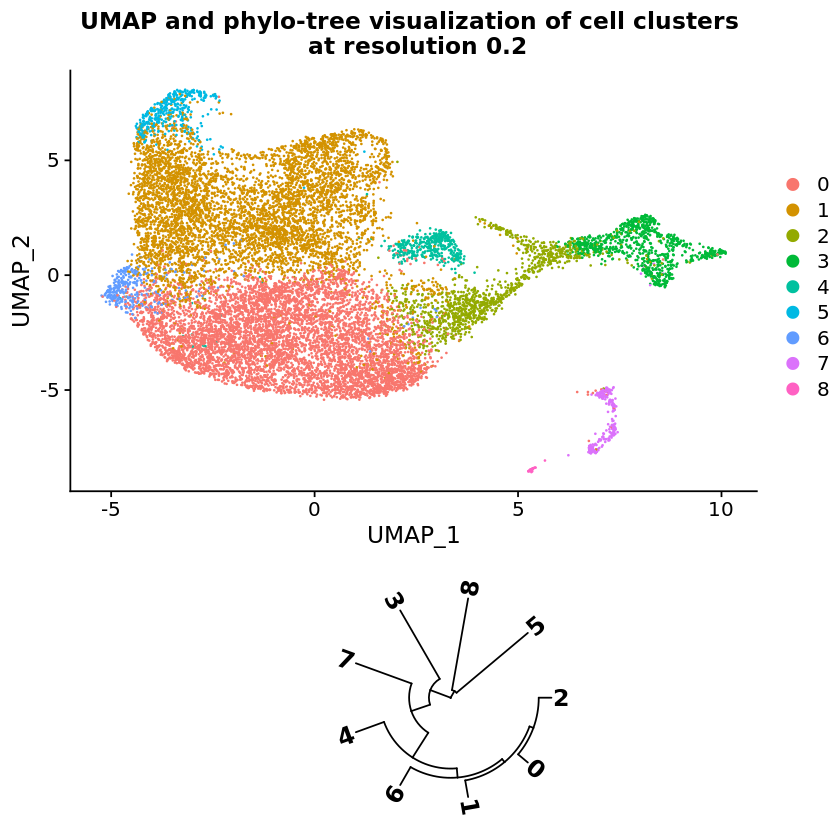

In [11]:
library(ggplot2)
library(ggtree)
library(cowplot)
clust.res=0.2
sce.seurat1=Seurat::FindClusters(sce.seurat1,resolution=clust.res)  
sce.seurat1= Seurat::BuildClusterTree(sce.seurat1,dims=sig_PCs)
#sce.seurat1 <- RunUMAP(sce.seurat1, dims = sig_PCs)
tree1=sce.seurat1@tools$`Seurat::BuildClusterTree`
pl=Seurat::DimPlot(sce.seurat1, reduction = "umap")
pl= pl+ ggtitle(paste("UMAP and phylo-tree visualization of cell clusters \n at resolution",clust.res,sep=" ")) +
  theme (plot.title = element_text(color="black", size=14, face="bold",hjust = 0.5))
pl.matrix=ggplot_build(pl)$data[1][[1]]
uni_pl_mat=pl.matrix[!duplicated(pl.matrix$group),]
tr=ggtree(tree1,layout="circular") + geom_tiplab(aes(angle=angle), lwd=5,offset=.5,fontface="bold")  
plot_grid(pl, tr, align = "v", nrow = 2, rel_heights = c(2/3, 1/3),axis="l")    
#jpeg(paste0(out,"CLUSTERING_NO_PBMC.jpeg"))
 #plot_grid(pl, tr, align = "v", nrow = 2, rel_heights = c(2/3, 1/3),axis="l")
#dev.off()
res1=clust_test(sce.seurat1)
res1
#write.csv(res1,file=paste0(out,"CLUSTERING_NO_PBMC.csv"))

In [12]:
save(sce.seurat1,file="all_chicken_legs_harmony_integrated_mtRNA30.RData")

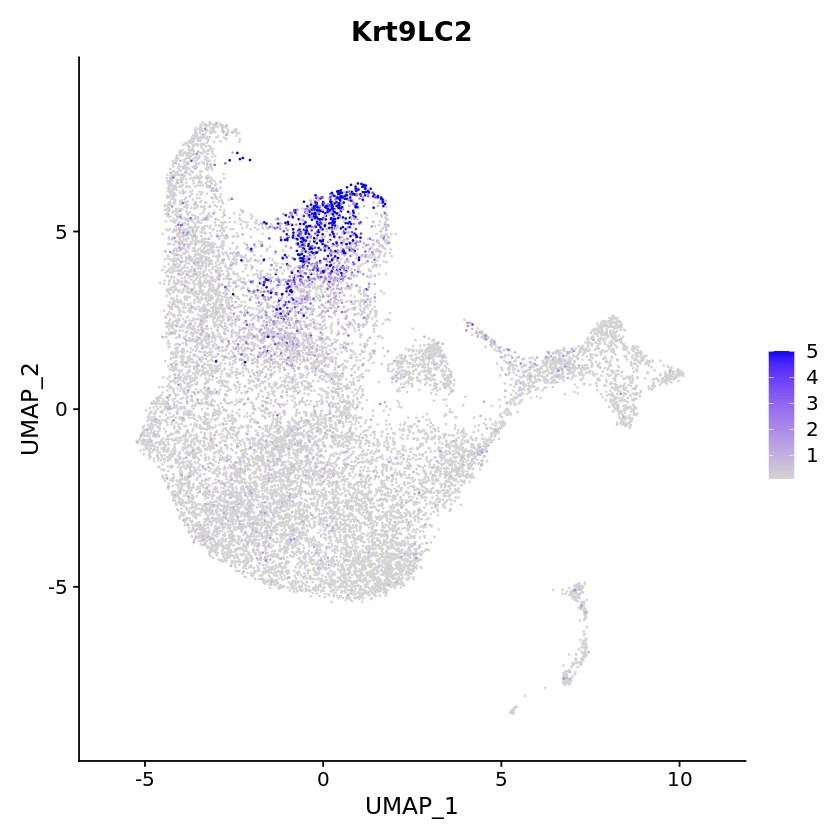

In [13]:
DefaultAssay(sce.seurat1)=c("RNA")
i=c("Krt9LC2")  #LOR1-EDC #Krt5L1 Krt14L1  Krt9LC1 CBP63-K  Krt9L4    Krt9LC2 == cluster 4   Krt9L4 == cluster 6
p=FeaturePlot(sce.seurat1,features = as.character(i),min.cutoff=0.1,max.cutoff=5)
p

In [14]:
head(sce.seurat1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,doub_score,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,CC.Difference,replicate,SCT_snn_res.0.2,seurat_clusters
AAACCTGAGAATAGGG-1_1,SeuratProject,366,244,0.000000,13.064133,803,293,-0.007016679,0.017113929,G2M,SeuratProject,-0.024130609,1,1,1
AAACCTGAGACAGACC-1_1,SeuratProject,1097,455,1.714799,2.053571,1014,454,-0.010900393,-0.018635772,G1,SeuratProject,0.007735379,1,0,0
AAACCTGAGGTGCAAC-1_1,SeuratProject,757,394,4.349522,5.137845,867,394,0.050627404,0.006624701,S,SeuratProject,0.044002702,1,0,0
AAACCTGAGTTGCAGG-1_1,SeuratProject,1313,540,3.202742,1.129518,1071,537,-0.017155208,-0.018723735,G1,SeuratProject,0.001568527,1,0,0
AAACCTGCACCACCAG-1_1,SeuratProject,3059,1099,2.768196,1.354402,1175,750,0.065230522,-0.029914334,S,SeuratProject,0.095144855,1,6,6
AAACCTGCATGCATGT-1_1,SeuratProject,2748,711,1.863766,1.186624,1154,548,-0.026489118,-0.015331881,G1,SeuratProject,-0.011157238,1,1,1


# check saved objects

png 
  2

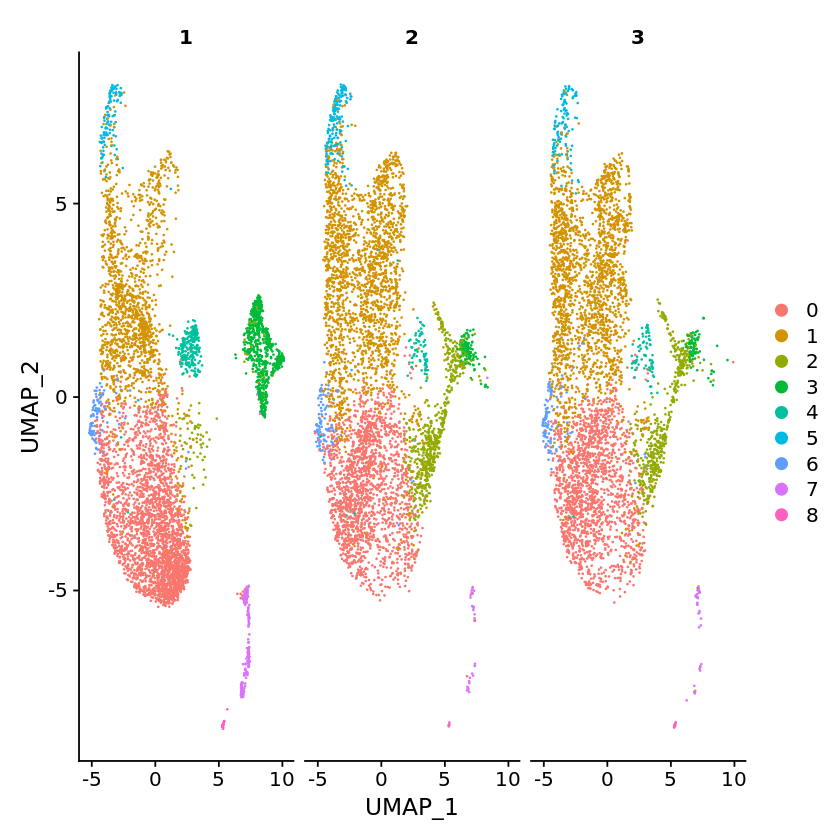

In [15]:
library(Seurat)
jpeg("all_chicken_legs_harmony_mt30.RData")
UMAPPlot(sce.seurat1,split.by="replicate")
dev.off()
UMAPPlot(sce.seurat1,split.by="replicate")

In [16]:
head(sce.seurat1@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,doub_score,percent.mt,nCount_SCT,nFeature_SCT,S.Score,G2M.Score,Phase,old.ident,CC.Difference,replicate,SCT_snn_res.0.2,seurat_clusters
AAACCTGAGAATAGGG-1_1,SeuratProject,366,244,0.000000,13.064133,803,293,-0.007016679,0.017113929,G2M,SeuratProject,-0.024130609,1,1,1
AAACCTGAGACAGACC-1_1,SeuratProject,1097,455,1.714799,2.053571,1014,454,-0.010900393,-0.018635772,G1,SeuratProject,0.007735379,1,0,0
AAACCTGAGGTGCAAC-1_1,SeuratProject,757,394,4.349522,5.137845,867,394,0.050627404,0.006624701,S,SeuratProject,0.044002702,1,0,0
AAACCTGAGTTGCAGG-1_1,SeuratProject,1313,540,3.202742,1.129518,1071,537,-0.017155208,-0.018723735,G1,SeuratProject,0.001568527,1,0,0
AAACCTGCACCACCAG-1_1,SeuratProject,3059,1099,2.768196,1.354402,1175,750,0.065230522,-0.029914334,S,SeuratProject,0.095144855,1,6,6
AAACCTGCATGCATGT-1_1,SeuratProject,2748,711,1.863766,1.186624,1154,548,-0.026489118,-0.015331881,G1,SeuratProject,-0.011157238,1,1,1


In [17]:
phe=sce.seurat@meta.data[,c("percent.mt","nCount_RNA","nFeature_RNA","doub_score","nCount_SCT","nFeature_SCT","S.Score","replicate")]
phe$ID=as.character(rownames(sce.seurat1@meta.data))
pcs=sce.seurat1@reductions$harmony@cell.embeddings[,1:15]
reg.dat=as.data.frame(cbind(phe,pcs))



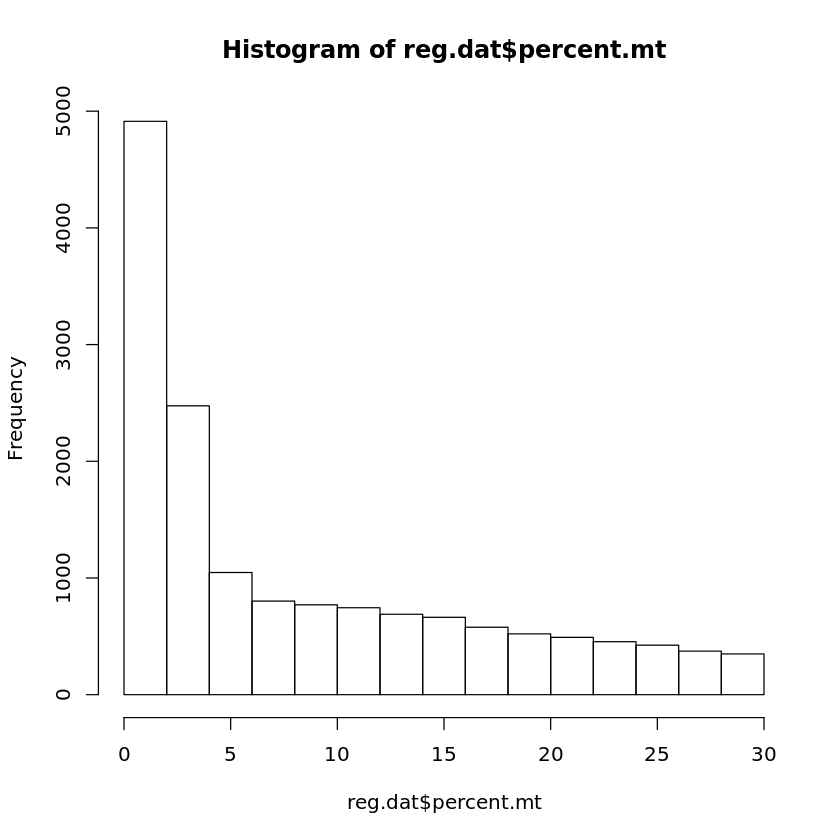

In [18]:
hist(reg.dat$percent.mt)

In [19]:
head (reg.dat$percent.mt)

[1] 13.064133  2.053571  5.137845  1.129518  1.354402  1.186624

In [20]:
summary(lm(paste("harmony_",k,"~percent.mt",sep=""),data=reg.dat))


ERROR: Error in eval(quote(list(...)), env): object 'k' not found


In [ ]:
sig_PCs=c(15)
mt_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))

for (k in 1:sig_PCs){
  fit=summary(lm(paste("harmony_",k,"~percent.mt",sep=""),data=reg.dat))$coefficients[2,]
  mt_vs_PCs[k,1]=paste("harmony_",k,sep="")
  mt_vs_PCs[k,2:5]=fit
}
print(paste("multiple testing threshold is ",0.05/sig_PCs,sep=""))
print("++++++++++ associations between mitochnodrial RNA content and PCs in analysis +++++++++++++")

In [ ]:
# define the number of PCs you think make sense in your analysis
sig_PCs=c(15)

mt_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))
for (k in 1:sig_PCs){
  fit=summary(lm(paste("PC_",k,"~perc_mt",sep=""),data=reg.dat))$coefficients[2,]
  mt_vs_PCs[k,1]=paste("PC_",k,sep="")
  mt_vs_PCs[k,2:5]=fit
}
print(paste("multiple testing threshold is ",0.05/sig_PCs,sep=""))
print("++++++++++ associations between mitochnodrial RNA content and PCs in analysis +++++++++++++")
mt_vs_PCs
## library size 
libS_vs_PCs=data.frame(ID= rep(NA,sig_PCs),Estimate=rep(NA,sig_PCs),std_err=rep(NA,sig_PCs),t_val=rep(NA,sig_PCs),P_val=rep(NA,sig_PCs))
for (k in 1:sig_PCs){
  fit=summary(lm(paste("PC_",k,"~log_LIBsize",sep=""),data=reg.dat))$coefficients[2,]
  libS_vs_PCs[k,1]=paste("PC_",k,sep="")
  libS_vs_PCs[k,2:5]=fit
}
print("++++++++++ associations between library size and PCs in analysis +++++++++++++")
libS_vs_PCs
overview["PCs_assocTECH",2]=(length(which(libS_vs_PCs$P_val < (0.05/sig_PCs))) + length(which(mt_vs_PCs$P_val < (0.05/sig_PCs))))